In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.filterwarnings("ignore")

### 1. Explore Data

In [2]:
df = pd.read_csv("spam.csv", encoding="latin")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.columns = ['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [9]:
df['length_text'] = df['text'].apply(len)
df.head()

,label,text,length_text
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


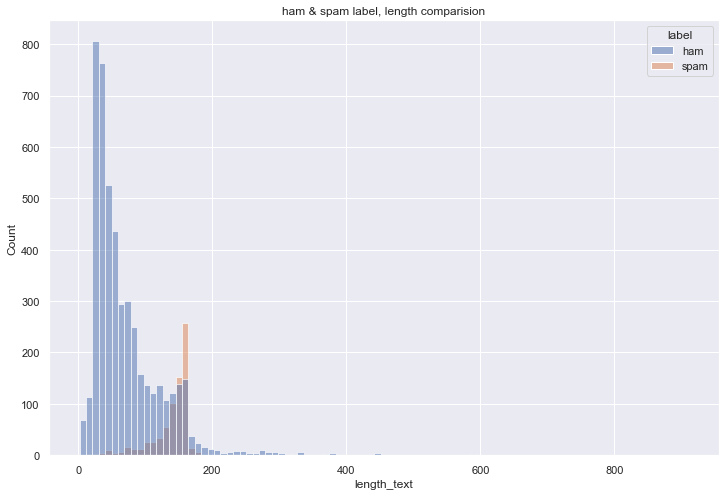

In [10]:
# Plot correlation between length and label
fig = plt.figure(figsize=(12, 8))
sns.histplot(
    x = df['length_text'],
    hue = df['label']
)
plt.title("ham & spam label, length comparision")
plt.show()

In [11]:
df[df['label'] == 'ham']['length_text'].describe()

count    4825.000000
mean       71.023627
std        58.016023
min         2.000000
25%        33.000000
50%        52.000000
75%        92.000000
max       910.000000
Name: length_text, dtype: float64

In [12]:
df[df['label'] == 'spam']['length_text'].describe()

count    747.000000
mean     138.866131
std       29.183082
min       13.000000
25%      132.500000
50%      149.000000
75%      157.000000
max      224.000000
Name: length_text, dtype: float64

In [13]:
label_check = np.unique(df['label'], return_counts=True)
label_check

(array(['ham', 'spam'], dtype=object), array([4825,  747], dtype=int64))

In [14]:
label_count = {str(label_check[0][0]): label_check[1][0], str(label_check[0][1]): label_check[1][1]}
label_count

{'ham': 4825, 'spam': 747}

In [15]:
print('ham contain {:.2f}% of all'.format(label_count['ham'] / sum(label_count.values()) * 100))
print('spam contain {:.2f}% of all'.format(label_count['spam'] / sum(label_count.values()) * 100))

ham contain 86.59% of all
spam contain 13.41% of all


We can see, it's very different between percent of ham and spam.
So i will balance it now.

In [16]:
#compute the length of majority & minority class
minority_length = len(df[df['label'] == "spam"])
majority_length = len(df[df['label'] == "ham"])

#store the indices of majority and minority class
minority_indices = df[df['label'] == "spam"].index
majority_indices = df[df['label'] == "ham"].index
print("- minority_indices: " + str(minority_indices))
print("- majority_indices: " + str(majority_indices))

- minority_indices: Int64Index([   2,    5,    8,    9,   11,   12,   15,   19,   34,   42,
            ...
            5492, 5497, 5501, 5524, 5526, 5537, 5540, 5547, 5566, 5567],
           dtype='int64', length=747)
- majority_indices: Int64Index([   0,    1,    3,    4,    6,    7,   10,   13,   14,   16,
            ...
            5560, 5561, 5562, 5563, 5564, 5565, 5568, 5569, 5570, 5571],
           dtype='int64', length=4825)


In [17]:
# generate new majority indices from total majority_indices
# We want obtain equivalent number of indices length, so i will use size equal to minority class length
random_majority_indices = np.random.choice(
    majority_indices,
    size=minority_length,
    replace=False
)

# Test output
[x in majority_indices for x in random_majority_indices[:10]]


[True, True, True, True, True, True, True, True, True, True]

In [18]:
samples_indices = np.concatenate([minority_indices, random_majority_indices])
samples_indices

array([   2,    5,    8, ..., 1488,  813, 1213], dtype=int64)

In [19]:
#create df using new indices
df = df.loc[samples_indices]
df

,label,text,length_text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148
8,spam,WINNER!! As a valued network customer you have...,158
9,spam,Had your mobile 11 months or more? U R entitle...,154
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136
...,...,...,...
4919,ham,"G says you never answer your texts, confirm/deny",48
4911,ham,I am on the way to tirupur.,27
1488,ham,Tell them no need to investigate about me anyw...,51
813,ham,I borrow ur bag ok.,19


In [20]:
df.shape

(1494, 3)

In [21]:
#shuffle the sample
df=df.sample(frac=1)
df.head()

,label,text,length_text
938,spam,Urgent! call 09061749602 from Landline. Your c...,149
1122,ham,Ok.ok ok..then..whats ur todays plan,36
2833,ham,U sick still can go shopping?,29
4757,spam,URGENT! Your Mobile number has been awarded wi...,144
1491,spam,Your account has been credited with 500 FREE T...,130


In [22]:
#reset the index as its all mixed
df=df.reset_index()
df.drop(['index'], axis=1, inplace=True)
df.head()

,label,text,length_text
0,spam,Urgent! call 09061749602 from Landline. Your c...,149
1,ham,Ok.ok ok..then..whats ur todays plan,36
2,ham,U sick still can go shopping?,29
3,spam,URGENT! Your Mobile number has been awarded wi...,144
4,spam,Your account has been credited with 500 FREE T...,130


In [23]:
np.unique(df['label'], return_counts=True)

(array(['ham', 'spam'], dtype=object), array([747, 747], dtype=int64))

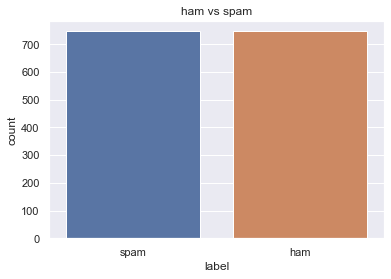

In [24]:
sns.countplot(
    data=df,
    x='label'
)
plt.title('ham vs spam')
plt.show()

### 2. Feature Extractions

#### - First, i have number of character in 'length_text'
#### - Now, let's check how many words in each text?

In [25]:
df['word_count'] = df['text'].apply(lambda x: len(x.split(" ")))
df.head(5)

,label,text,length_text,word_count
0,spam,Urgent! call 09061749602 from Landline. Your c...,149,23
1,ham,Ok.ok ok..then..whats ur todays plan,36,5
2,ham,U sick still can go shopping?,29,6
3,spam,URGENT! Your Mobile number has been awarded wi...,144,23
4,spam,Your account has been credited with 500 FREE T...,130,22


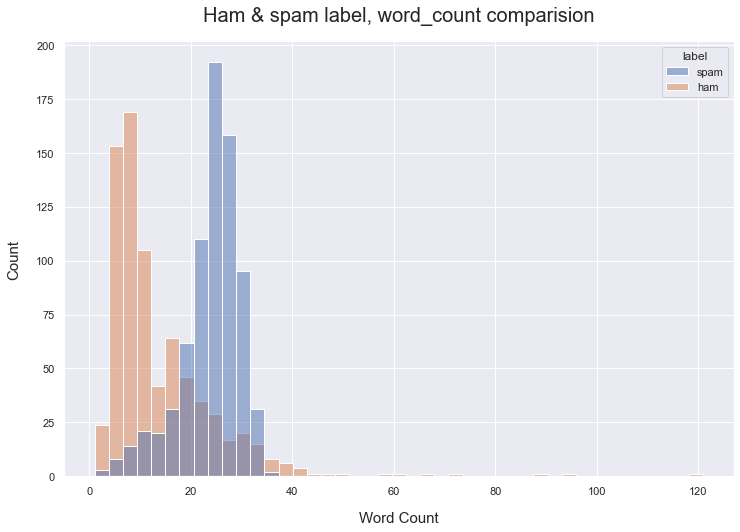

In [26]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(
    x = df['word_count'],
    hue = df['label']
)
plt.xlabel('Word Count', labelpad=15, fontsize=15)
plt.ylabel('Count', labelpad=15, fontsize=15)
plt.title("Ham & spam label, word_count comparision", pad=20, fontsize=20)
plt.show()

#### - Average word length can also potentially help me in improving my model

In [27]:
def avg_word_len(text):
    words = text.split(" ")
    return (sum(len(word) for word in words) / len(words))

In [28]:
df['avg_word_len'] = df['text'].apply(lambda x:avg_word_len(x))
df.head()

,label,text,length_text,word_count,avg_word_len
0,spam,Urgent! call 09061749602 from Landline. Your c...,149,23,5.521739
1,ham,Ok.ok ok..then..whats ur todays plan,36,5,6.400000
2,ham,U sick still can go shopping?,29,6,4.000000
3,spam,URGENT! Your Mobile number has been awarded wi...,144,23,5.304348
4,spam,Your account has been credited with 500 FREE T...,130,22,4.954545


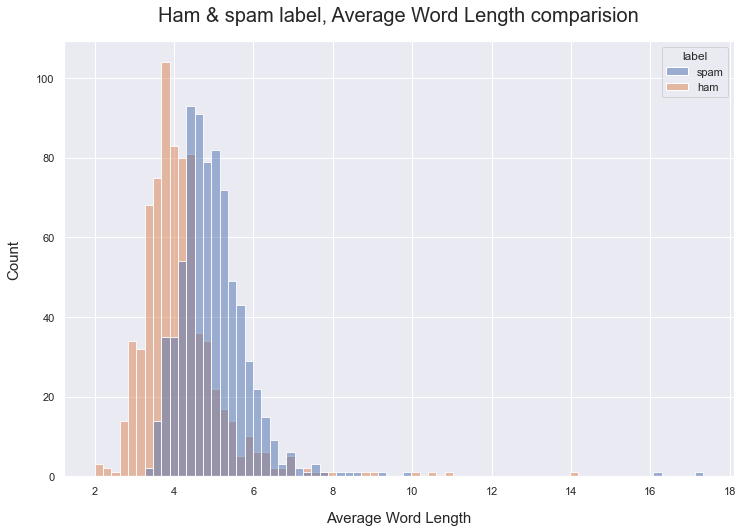

In [29]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(
    x = df['avg_word_len'],
    hue = df['label']
)
plt.xlabel('Average Word Length', labelpad=15, fontsize=15)
plt.ylabel('Count', labelpad=15, fontsize=15)
plt.title("Ham & spam label, Average Word Length comparision", pad=20, fontsize=20)
plt.show()

#### - Number of stop_words
While solving NLP problems, we usually remove stop_word first. But sometimes, calculating the number of stopword can give us some extra information which we might remove before.

In [30]:
from nltk.corpus import stopwords
stop_w = stopwords.words('English')
df['num_stop_w'] = df['text'].apply(lambda x: len([word for word in x.split(" ") if word in stop_w]))
df.head()

,label,text,length_text,word_count,avg_word_len,num_stop_w
0,spam,Urgent! call 09061749602 from Landline. Your c...,149,23,5.521739,2
1,ham,Ok.ok ok..then..whats ur todays plan,36,5,6.400000,0
2,ham,U sick still can go shopping?,29,6,4.000000,1
3,spam,URGENT! Your Mobile number has been awarded wi...,144,23,5.304348,6
4,spam,Your account has been credited with 500 FREE T...,130,22,4.954545,6


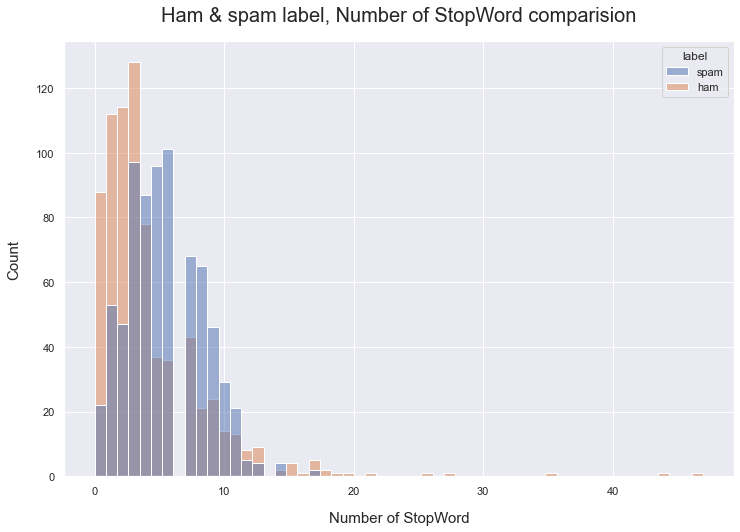

In [31]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(
    x = df['num_stop_w'],
    hue = df['label']
)
plt.xlabel('Number of StopWord', labelpad=15, fontsize=15)
plt.ylabel('Count', labelpad=15, fontsize=15)
plt.title("Ham & spam label, Number of StopWord comparision", pad=20, fontsize=20)
plt.show()

#### - Number of special character.
It seem more special character, it will be spam. Let's check this condition.

In [32]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
df['num_special_char'] = df['text'].apply(lambda x: len([char for char in x if char in string.punctuation]))
df[['label', 'text', 'num_special_char']].head()

,label,text,num_special_char
0,spam,Urgent! call 09061749602 from Landline. Your c...,6
1,ham,Ok.ok ok..then..whats ur todays plan,5
2,ham,U sick still can go shopping?,1
3,spam,URGENT! Your Mobile number has been awarded wi...,4
4,spam,Your account has been credited with 500 FREE T...,7


#### Number of numerics
##### - It's also useful feature.
+ depending on each problem, we can choose just count number of numerics like 1, 2, 34859 ... 
+ or count every word constain number in itself like 1, 2, 3rd, 4years, 3hf323, 8fs9df, $100 ...
- In this case, i choose count every word constain number like a features.

In [34]:
df['contains_num'] = df['text'].apply(lambda x: len([word for word in x if any(map(str.isdigit, word))]))
df[['label', 'text', 'contains_num']].head()

,label,text,contains_num
0,spam,Urgent! call 09061749602 from Landline. Your c...,28
1,ham,Ok.ok ok..then..whats ur todays plan,0
2,ham,U sick still can go shopping?,0
3,spam,URGENT! Your Mobile number has been awarded wi...,24
4,spam,Your account has been credited with 500 FREE T...,13


#### - Number of UPCASEWORD

In [35]:
df['num_upcase'] = df['text'].apply(lambda x: len([word for word in x.split(" ") if word.isupper()]))
df[['label', 'text', 'num_upcase']].head()

,label,text,num_upcase
0,spam,Urgent! call 09061749602 from Landline. Your c...,4
1,ham,Ok.ok ok..then..whats ur todays plan,0
2,ham,U sick still can go shopping?,1
3,spam,URGENT! Your Mobile number has been awarded wi...,2
4,spam,Your account has been credited with 500 FREE T...,2


### 3.Pre-processcing

In [36]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus.reader import wordnet

In [37]:
def tag(t):
    if t.startswith("N"):
        return wordnet.NOUN
    elif t.startswith("V"):
        return wordnet.VERB
    elif t.startswith("R"):
        return wordnet.ADV
    elif t.startswith("J"):
        return wordnet.ADJ
    else:
        return wordnet.NOUN

In [38]:
def remove_num(text, num_only=False):
    if not num_only:
        # just remove number like 1, 123123, 55325794, ...
        token = [w for w in text if not w.isdigit()]
    else:
        # remove all word which contains num like 1, 213, as89, 12th, 3rd ...
        token = [w for w in text if not any(map(str.isdigit, w))]
    return ' '.join(token)

In [39]:
def clean_text(text, num_only=False):
    """
    First of all, remove special character.
    It doesn't any extra functions. So remove it help reduce size of data
    string.punctuation contains all special character like @ $ # * & ...
    # Another solutions:
        df['text'].str.replace('[\w\s]', '')
    """
    translators = str.maketrans("", "", string.punctuation)
    text = text.translate(translators)
    
    """
    Next, i will lowercase character and remove number.
    If we don't lowercase, when count word, Basic and basic are 2 different word
    This avoid mutiplies copy in same word.
    """
    words = word_tokenize(text.lower())
    tokens = word_tokenize(remove_num(words, False))
    
    """
    Then, remove stop word and word that length <= 1
    Because, word has length <= 1 usually dont have meaning
    """
    tokens = [w for w in tokens if w not in stop_w and len(w) > 1]
    
    return " ".join(tokens)

In [40]:
df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text']].head()

,text,clean_text
0,Urgent! call 09061749602 from Landline. Your c...,urgent call landline complimentary tenerife ho...
1,Ok.ok ok..then..whats ur todays plan,okok okthenwhats ur todays plan
2,U sick still can go shopping?,sick still go shopping
3,URGENT! Your Mobile number has been awarded wi...,urgent mobile number awarded å£2000 prize guar...
4,Your account has been credited with 500 FREE T...,account credited free text messages activate t...


#### - Common word removal

In [41]:
freq_word = pd.Series(' '.join(df['clean_text']).split(" ")).value_counts()[:10]
freq_word

call      387
free      224
ur        189
txt       152
text      131
mobile    129
get       128
stop      117
claim     113
reply     102
dtype: int64

In [42]:
freq = list(freq_word.index)
freq

['call',
 'free',
 'ur',
 'txt',
 'text',
 'mobile',
 'get',
 'stop',
 'claim',
 'reply']

In [43]:
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([w for w in x.split(" ") if x not in freq_word]))
df[['text', 'clean_text']].head()

,text,clean_text
0,Urgent! call 09061749602 from Landline. Your c...,urgent call landline complimentary tenerife ho...
1,Ok.ok ok..then..whats ur todays plan,okok okthenwhats ur todays plan
2,U sick still can go shopping?,sick still go shopping
3,URGENT! Your Mobile number has been awarded wi...,urgent mobile number awarded å£2000 prize guar...
4,Your account has been credited with 500 FREE T...,account credited free text messages activate t...


#### - Rarely word removal
- It's so rarely. The association between them and other word is dominated by noise.
- You can replace rare words with a more general form and then this will have higher counts

In [44]:
rarely_word = pd.Series(' '.join(df['clean_text']).split(" ")).value_counts()[-10:]
rarely_word

callsmessagesmissed    1
stories                1
w1t1jy                 1
30th                   1
prescription           1
fgkslpo                1
filthyguys             1
tat                    1
mgs                    1
ganesh                 1
dtype: int64

In [45]:
freq = list(rarely_word.index)
freq

['callsmessagesmissed',
 'stories',
 'w1t1jy',
 '30th',
 'prescription',
 'fgkslpo',
 'filthyguys',
 'tat',
 'mgs',
 'ganesh']

In [46]:
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([w for w in x.split(" ") if w not in freq]))
df[['text', 'clean_text']].head()

,text,clean_text
0,Urgent! call 09061749602 from Landline. Your c...,urgent call landline complimentary tenerife ho...
1,Ok.ok ok..then..whats ur todays plan,okok okthenwhats ur todays plan
2,U sick still can go shopping?,sick still go shopping
3,URGENT! Your Mobile number has been awarded wi...,urgent mobile number awarded å£2000 prize guar...
4,Your account has been credited with 500 FREE T...,account credited free text messages activate t...


#### - Spelling correction.
We should replace mistake spelling order to reduce multiples of copies word. Like (u, you) ...

In [47]:
from textblob import TextBlob

In [48]:
df['spelling_correction'] = df['clean_text'].apply(lambda x: str(TextBlob(x).correct()))
df[['text', 'clean_text', 'spelling_correction']].head()

,text,clean_text,spelling_correction
0,Urgent! call 09061749602 from Landline. Your c...,urgent call landline complimentary tenerife ho...,urgent call lanoline complimentary tenerife ho...
1,Ok.ok ok..then..whats ur todays plan,okok okthenwhats ur todays plan,took okthenwhats or today plan
2,U sick still can go shopping?,sick still go shopping,sick still go shopping
3,URGENT! Your Mobile number has been awarded wi...,urgent mobile number awarded å£2000 prize guar...,urgent mobile number awarded å£2000 prize guar...
4,Your account has been credited with 500 FREE T...,account credited free text messages activate t...,account created free text messages activate tx...


#### - Lemmatization
Convert the word into the root word
Exp: Did-> do, are-> be, years-> year, went-> go, talked -> talk ...

In [49]:
def lemmatize(text):
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.pos_tag(tokens)
    tokens = [lemmatizer.lemmatize(w, pos=tag(wn)) for w, wn in tokens]
    
    return " ".join(tokens)

In [50]:
df['clean_text'] = df['clean_text'].apply(lambda x: lemmatize(x))
df['spelling_correction'] = df['spelling_correction'].apply(lambda x: lemmatize(x))
df[['text', 'clean_text', 'spelling_correction']].head()

,text,clean_text,spelling_correction
0,Urgent! call 09061749602 from Landline. Your c...,urgent call landline complimentary tenerife ho...,urgent call lanoline complimentary tenerife ho...
1,Ok.ok ok..then..whats ur todays plan,okok okthenwhats ur today plan,take okthenwhats or today plan
2,U sick still can go shopping?,sick still go shopping,sick still go shopping
3,URGENT! Your Mobile number has been awarded wi...,urgent mobile number award å£2000 prize guaran...,urgent mobile number award å£2000 prize guaran...
4,Your account has been credited with 500 FREE T...,account credit free text message activate txt ...,account create free text message activate txt ...


#### - Ngrams
The combinations of multiple words use together.

In [53]:
TextBlob(df['clean_text'][1]).ngrams(2)

[WordList(['okok', 'okthenwhats']),
 WordList(['okthenwhats', 'ur']),
 WordList(['ur', 'today']),
 WordList(['today', 'plan'])]

### 1. Tf-idf

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
tfidf = TfidfVectorizer(max_features=1000, analyzer='word', ngram_range=(1, 1))

In [57]:
tfidf_text_res = tfidf.fit_transform(df['clean_text']).toarray()
tfidf_text_res

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [59]:
tfidf_text_df = pd.DataFrame(tfidf_text_res, columns=tfidf.get_feature_names())
tfidf_text_df.columns = ["word_" + str(x) for x in tfidf_text_df.columns]
tfidf_text_df

,word_10,word_100,word_1000,word_10000,word_10am7pm,word_10p,word_10pmin,word_11mths,word_12hrs,word_150,...,word_yesterday,word_yet,word_yo,word_youll,word_youre,word_youve,word_yr,word_yup,word_zed,word_ìï
0,0.0,0.0,0.0,0.351391,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.328329,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1490,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1491,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1492,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
tfidf_text_df.index = df.index
df_clean = pd.concat([df, tfidf_text_df], axis=1)
df_clean.head()

,label,text,length_text,word_count,avg_word_len,num_stop_w,num_special_char,contains_num,num_upcase,clean_text,...,word_yesterday,word_yet,word_yo,word_youll,word_youre,word_youve,word_yr,word_yup,word_zed,word_ìï
0,spam,Urgent! call 09061749602 from Landline. Your c...,149,23,5.521739,2,6,28,4,urgent call landline complimentary tenerife ho...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ham,Ok.ok ok..then..whats ur todays plan,36,5,6.400000,0,5,0,0,okok okthenwhats ur today plan,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ham,U sick still can go shopping?,29,6,4.000000,1,1,0,1,sick still go shopping,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,spam,URGENT! Your Mobile number has been awarded wi...,144,23,5.304348,6,4,24,2,urgent mobile number award å£2000 prize guaran...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,spam,Your account has been credited with 500 FREE T...,130,22,4.954545,6,7,13,2,account credit free text message activate txt ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
df_clean.drop('spelling_correction', axis=1, inplace=True)

### 2. Sentiment Analysis
- My problem just classifier spam or not. 
- So maybe we don't need detect sentiment in text.
- Therefore I will demo the first few text but not use it like a feature in my model.

In [65]:
df['clean_text'][:5].apply(lambda x: TextBlob(x).sentiment)

0                                   (0.3, 0.5)
1                                   (0.0, 0.0)
2    (-0.7142857142857143, 0.8571428571428571)
3                                   (0.0, 0.0)
4                                   (0.4, 0.8)
Name: clean_text, dtype: object

##### Each word in the lexicon has scores for:
##### 1)     polarity: negative vs. positive    (-1.0 => +1.0)
##### 2) subjectivity: objective vs. subjective (+0.0 => +1.0)

In [70]:
print(TextBlob(df['clean_text'][4]).sentiment)
print(df['text'][4])

Sentiment(polarity=0.4, subjectivity=0.8)
Your account has been credited with 500 FREE Text Messages. To activate, just txt the word: CREDIT to No: 80488 T&Cs www.80488.biz


- df['text'][4] has a polarity of about 0.4, meaning it is slightly positive, and a subjectivity of about 0.8, meaning it is strongly subjective.

### 3. Doc2Vec

In [72]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [73]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df['clean_text'].apply(lambda x: x.split(" ")))]

# Train a Doc2Vec model with out text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# Transform each documnet into a vector data
doc2vec_df = df["clean_text"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.head(5)

,0,1,2,3,4
0,0.235795,0.303313,0.110080,-0.375488,-0.085456
1,0.060201,0.179975,0.069995,-0.138131,0.095679
2,0.111403,0.028577,-0.053423,-0.115529,-0.077351
3,0.026710,-0.049836,0.054807,-0.021910,-0.144600
4,0.114976,0.213906,0.104933,-0.314616,-0.069216


In [74]:
doc2vec_df.columns = ['doc2vec_vector_' + str(x) for x in doc2vec_df.columns]
df_clean = pd.concat([df_clean, doc2vec_df], axis=1)
df_clean

,label,text,length_text,word_count,avg_word_len,num_stop_w,num_special_char,contains_num,num_upcase,clean_text,...,word_youve,word_yr,word_yup,word_zed,word_ìï,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
0,spam,Urgent! call 09061749602 from Landline. Your c...,149,23,5.521739,2,6,28,4,urgent call landline complimentary tenerife ho...,...,0.0,0.0,0.0,0.0,0.0,0.235795,0.303313,0.110080,-0.375488,-0.085456
1,ham,Ok.ok ok..then..whats ur todays plan,36,5,6.400000,0,5,0,0,okok okthenwhats ur today plan,...,0.0,0.0,0.0,0.0,0.0,0.060201,0.179975,0.069995,-0.138131,0.095679
2,ham,U sick still can go shopping?,29,6,4.000000,1,1,0,1,sick still go shopping,...,0.0,0.0,0.0,0.0,0.0,0.111403,0.028577,-0.053423,-0.115529,-0.077351
3,spam,URGENT! Your Mobile number has been awarded wi...,144,23,5.304348,6,4,24,2,urgent mobile number award å£2000 prize guaran...,...,0.0,0.0,0.0,0.0,0.0,0.026710,-0.049836,0.054807,-0.021910,-0.144600
4,spam,Your account has been credited with 500 FREE T...,130,22,4.954545,6,7,13,2,account credit free text message activate txt ...,...,0.0,0.0,0.0,0.0,0.0,0.114976,0.213906,0.104933,-0.314616,-0.069216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,spam,Ur HMV Quiz cash-balance is currently å£500 - ...,105,19,4.578947,5,4,12,2,ur hmv quiz cashbalance currently å£500 maximi...,...,0.0,0.0,0.0,0.0,0.0,0.137499,0.309040,0.182448,-0.341011,0.028892
1490,ham,Hows that watch resizing,24,4,5.250000,1,0,0,0,hows watch resize,...,0.0,0.0,0.0,0.0,0.0,0.113549,0.123448,0.097436,-0.062382,0.046658
1491,ham,SO IS TH GOWER MATE WHICH IS WHERE I AM!?! HOW...,140,34,3.147059,0,8,1,31,th gower mate man good wale ill back åômorrow ...,...,0.0,0.0,0.0,0.0,0.0,0.356328,0.405319,0.237436,-0.476813,-0.037449
1492,spam,Email AlertFrom: Jeri StewartSize: 2KBSubject:...,101,13,6.846154,1,4,4,0,email alertfrom jeri stewartsize 2kbsubject lo...,...,0.0,0.0,0.0,0.0,0.0,0.357156,0.422443,0.159213,-0.501775,-0.017120


### NOW WE HAVE LIST OF FEATURES THAT WERE CONBINED OF 2 APPROACHES
- Doc2Vec
- TfIdf
### Let's build model 

In [76]:
from sklearn.model_selection import train_test_split

In [78]:
df_train = df_clean.drop(['label', 'text', 'clean_text'], axis=1)
df_train.head()

,length_text,word_count,avg_word_len,num_stop_w,num_special_char,contains_num,num_upcase,word_10,word_100,word_1000,...,word_youve,word_yr,word_yup,word_zed,word_ìï,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
0,149,23,5.521739,2,6,28,4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.235795,0.303313,0.110080,-0.375488,-0.085456
1,36,5,6.400000,0,5,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.060201,0.179975,0.069995,-0.138131,0.095679
2,29,6,4.000000,1,1,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.111403,0.028577,-0.053423,-0.115529,-0.077351
3,144,23,5.304348,6,4,24,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.026710,-0.049836,0.054807,-0.021910,-0.144600
4,130,22,4.954545,6,7,13,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.114976,0.213906,0.104933,-0.314616,-0.069216


In [79]:
df_clean['label_num'] = df_clean['label'].apply(lambda x: 0 if x == 'ham' else 1)
df_clean[['label_num', 'label']].head(10)

,label_num,label
0,1,spam
1,0,ham
2,0,ham
3,1,spam
4,1,spam
5,0,ham
6,0,ham
7,0,ham
8,0,ham
9,1,spam


In [80]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_clean['label_num'], test_size = 0.3)

I will try with 3 algorithms to choose the best in this case.
+ PassiveAggressiveClassifier
+ LogisticRegression
+ RandomForestRegression

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [85]:
algo = [
    ('LGR', LogisticRegression()),
    ('RF', RandomForestClassifier()),
]

for name, alg in algo:
    y_pred = alg.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print('{}: {}'.format(name, score))

LGR: 0.9487750556792873
RF: 0.9665924276169265


#### I have RandomForestClassifier is better in this dataset.
